In [ ]:
from google.colab import drive, output
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import numpy
import math
import scipy.special
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
import plotly.express
from plotly.subplots import make_subplots
import plotly.graph_objs
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from warnings import filterwarnings

In [ ]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import precision_score,accuracy_score

In [ ]:
path = "/content/drive/MyDrive/water_potability.csv"
removeStuff = ['Hardness', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']

In [ ]:
df = pd.read_csv(path) # df reads the pandas data frame
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df['Potability'] = df['Potability'].astype('category') #converts the potablity into categorical
df.info() #prints the format of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               2785 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          2495 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3114 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


In [ ]:
# creates approve limit for each feature based on data avaialable 
cols = df.columns[0:9].to_list() #stored all the attributes
max_val = [6.52, 0, 500, 3, 0, 0, 0, 0] #stores the minimum values of all attributes
min_val = [6.83, 0, 1000, 4, 250, 400, 2, 80, 5] #stores the maximum values of all attributes
limit = pd.DataFrame(data=[min_val, max_val], columns = cols)

In [ ]:
df.describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap = 'PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [ ]:
df[df['Potability'] == 1].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'])

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [ ]:
df[df['Potability'] == 0].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'])

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# expresses the distribution of potability as a pie chart 
T = df.copy()
T.Potability =  T.Potability.map({1:'Potable',0:'Not Potable'})
plotly.express.pie(T,names='Potability',title='Distribution of Target Labels (Drinkability)')

In [ ]:
# put in missing places with means of thier repectives labels
for col in ['Sulfate','ph','Trihalomethanes']:
    missing_label_0 = df.query('Potability == 0')[col][df[col].isna()].index
    df.loc[missing_label_0,col] = df.query('Potability == 0')[col][df[col].notna()].mean()

    missing_label_1 = df.query('Potability == 1')[col][df[col].isna()].index
    df.loc[missing_label_1,col] = df.query('Potability == 1')[col][df[col].notna()].mean()

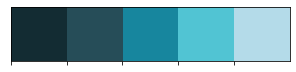

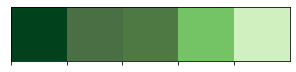

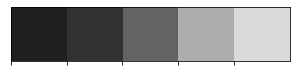

In [ ]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

In [ ]:
df = df.drop(removeStuff, axis=1)
fig = plotly.express.scatter_matrix(df,df.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7,
                        color_discrete_sequence=[colors_blue[3],colors_green[3]],color='Potability',
                       symbol='Potability',color_continuous_scale=[colors_green[3],colors_blue[3]])

fig.update_layout(font_family='monospace',font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]),
                 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97,
                   font=dict(color=colors_dark[2],size=24)))
fig.show()

In [ ]:
fig = make_subplots(rows=3, cols=1, shared_xaxes = True, subplot_titles=('Perason Correaltion',  'Spearman Correaltion','Kendall Correlation'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val = df.corr('pearson')
fig.add_trace(
    plotly.graph_objs.Heatmap(x = s_val.columns, y = s_val.index, z = s_val.values, name='pearson', showscale=False, xgap=1, ygap=1, colorscale=colorscale),
    row=1, col=1
)


s_val = df.corr('spearman')
fig.add_trace(
    plotly.graph_objs.Heatmap(x = s_val.columns, y = s_val.index, z = s_val.values, xgap = 1, ygap = 1, colorscale=colorscale),
    row=2, col=1
)

s_val = df.corr('kendall')
fig.add_trace(
    plotly.graph_objs.Heatmap(x = s_val.columns, y = s_val.index, z = s_val.values, xgap = 1, ygap = 1, colorscale=colorscale, showscale=False),
    row=3, col=1
)

fig.update_layout(height=1000, width=900, title_text="Different Inner Correlations Coefficients")
fig.show()

In [ ]:
X = df.drop(['Potability'], axis=1).values
y = df['Potability'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Modeling Selection

In [ ]:
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),
         ("SVC", SVC()),
         ('KNN', KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),
         ("GNB", GaussianNB()),
        #  ("SGDC", SGDClassifier()),
         ("Perc", Perceptron()),
         ("NC", NearestCentroid()),
        #  ("Ridge", RidgeClassifier()),
        #  ("NuSVC", NuSVC()),
        #  ("BNB", BernoulliNB()),
         ('RF', RandomForestClassifier()),
         ('ADA', AdaBoostClassifier()),
         ('GBC', GradientBoostingClassifier())]

finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    finalResults.append((name,score))
    
finalResults.append(('NN', 0.6082451678535096))
finalResults.sort(key=lambda k:k[1],reverse=True)


In [ ]:
finalResults#[:4]

[('GBC', 0.6772511235731615),
 ('ADA', 0.6695097331036655),
 ('RF', 0.6265568262802457),
 ('NN', 0.6082451678535096),
 ('DTC', 0.6033171190683306),
 ('SVC', 0.599079754601227),
 ('NC', 0.5306208053691275),
 ('Perc', 0.49645982363791785),
 ('KNN', 0.4953989080662205),
 ('GNB', 0.42294871794871797),
 ('LR', 0.29857578840284843)]

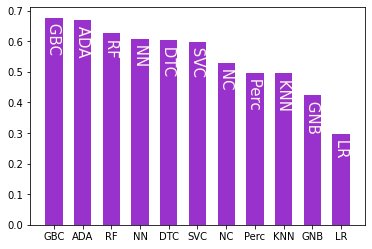

In [ ]:
fig, ax = plt.subplots()
width = 0.60
ax.bar([x[0] for x in finalResults], [x[1] for x in finalResults], width, color='darkorchid')
for i, (name, height) in enumerate(zip([x[0] for x in finalResults], [x[1] for x in finalResults])):
    ax.text(i, height, ' ' + name, color='seashell',
            ha='center', va='top', rotation=-90, fontsize=15)

Gradient Boosting Classifier Hyperparameter tuning

In [ ]:
# '''
# hyper-parameters tuning stuff based on the stuff above
# '''
# cv = GridSearchCV(GradientBoostingClassifier(), parameters) #declare it with attributes
# cv.fit(X_train, y_train) #attempt to optmise performance with the different parameters
# cv.best_estimator_ #the best fit
# precision_score(cv, model_results, average='macro')

In [ ]:
# parameters = {'learning_rate': [0.01, 0.05, 0.1, 0.2]
#               # 'n_estimators': [50,100,200,500],
#               # 'subsample': [1.0, 0.8],#0.8 might be better
#               # 'criterion': ['friedman_mse'],
#               # 'min_samples_split': [2, 5, 10, 20],
#               # 'min_samples_leaf': [100],
#               # 'max_depth': [3],
#               # # 'min_impurity_decrease': [0.175],
#               # 'max_leaf_nodes': [None],
#               # 'n_iter_no_change': [3],
#               # 'max_leaf_nodes':[16]
#               }

In [ ]:
score = []
for i in range(200):
  X = df.drop(['Potability'], axis=1).values
  y = df['Potability'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  model = GradientBoostingClassifier(learning_rate = 0.1, min_impurity_decrease=0.175, min_samples_leaf=4, n_estimators=100, n_iter_no_change=5, validation_fraction=0.15)
  model.fit(X_train, y_train)
  score.append(model.score(X_test, y_test))
sum(score)/len(score)

0.6682400813835201

In [ ]:
model = GradientBoostingClassifier(learning_rate = 0.1, min_impurity_decrease=0.175, min_samples_leaf=4, n_estimators=100, n_iter_no_change=5, validation_fraction=0.15)
model.fit(numpy.concatenate([X_train, X_test]), numpy.concatenate([y_train, y_test]))

GradientBoostingClassifier(min_impurity_decrease=0.175, min_samples_leaf=4,
                           n_iter_no_change=5, validation_fraction=0.15)

In [ ]:
model.predict_proba(X_test)[0]

array([0.58099197, 0.41900803])

In [ ]:
clf = model.estimators_.tolist()[20][0]

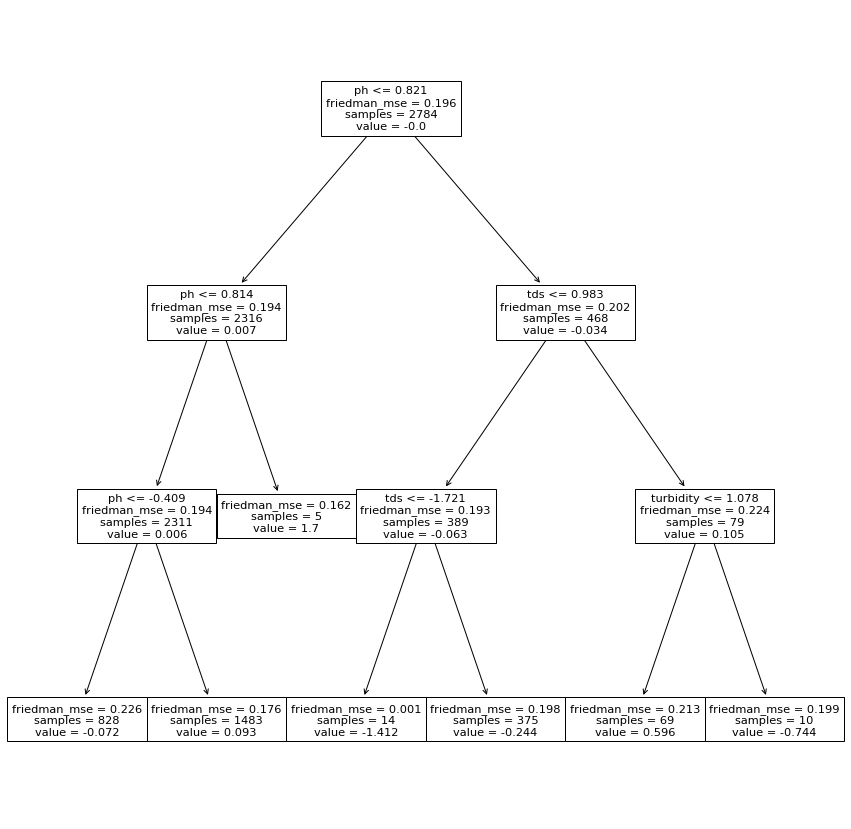

In [ ]:
from matplotlib.pyplot import figure
plt = figure(figsize=(15,15))
plot_tree(clf, feature_names = ["ph", "tds", "turbidity"])
plt.show()

In [ ]:
score = precision_score(y_test, model.predict(X_test),average='macro')
print(score)

0.7626690991337004


In [ ]:
import pickle
pickle.dump(model, open("pima.pickle.dat", "wb"))

Neural Network Stuff below

In [ ]:
input_nodes = 3
hidden_nodes = 25
output_nodes = 2 
learning_rate = 0.05
epochs = 6
TEST_SIZE = 0.3
conversion = {0:[1.0, 0.0], 1:[0.0, 1.0]}
removeParameters = [x for x in range(9) if x not in [0, 2, 8, 9]]
# removeParameters = [4,7]

In [ ]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)        
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [ ]:
lst = df.values.tolist()

In [ ]:
# '''
# find missing values and declare new removeParameters based on those missing values
# '''

# newLst = []
# newLst2 = []
# for i in range(len(lst)):
#   for j in range(len(lst[0])):
#     if lst[i][j] == '':
#       newLst.append(j)
#       newLst2.append(i)
#       # print(f'error: {i}, {j}')
# removeParameters = list(set(newLst)) 
# print(newLst2)
# print(set(newLst))

In [ ]:
# '''
# removes parameters
# '''
# lst = numpy.array(lst)
# c = 0
# for i in removeParameters:
#   lst = numpy.delete(lst, i-c, axis=1)
#   c += 1
# prints out the names of the attributes when data is imported from file
# after deletion 
# lst = lst.tolist()
# for i, j in enumerate(lst[0]):
#   print(i, j)

In [ ]:
#labels have to go through conversion
lst = [[round(float(x), 2) for x in lst[i]] for i in range(1, len(lst))]
array = [[lst[y][x] for x in range(len(lst[0])-1)] for y in range(len(lst))]#[1:]
# labels = [lst[y][len(lst[0])-1] for y in range(len(lst))]#[1:]
labels = [conversion[lst[y][len(lst[0])-1]] for y in range(len(lst))]#[1:]

In [ ]:
'''
normalisation
'''
tempArray = numpy.array(lst[1:]).T
tempArray.tolist()
rangeArray = [max([float(x) for x in tempArray[i]]) - min([float(x) for x in tempArray[i]]) for i in range(len(tempArray)-1)]
for i in range(len(array)):
  for j in range(len(rangeArray)):
    array[i][j] = array[i][j]/rangeArray[j]

In [ ]:
# scaler = StandardScaler(with_mean=True, with_std=True)
# scaler = scaler.fit(array)
# array = scaler.transform(array)

In [ ]:
# newScaler = StandardScaler(with_mean=True, with_std=True)
# newScaler.mean_ = numpy.asarray([7.08109924e+00, 2.20144658e+04, 3.96703817e+00])
# newScaler.var_ = numpy.asarray([2.16092001e+00, 7.68873781e+07, 6.08643197e-01])
# newScaler.scale_ = numpy.asarray([1.47000681e+00, 8.76854481e+03, 7.80155880e-01])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    numpy.array(array), numpy.array(labels), test_size=TEST_SIZE
)

In [ ]:
labels[:5][0]

[1.0, 0.0]

In [ ]:
numpy.array(array[0])

array([0.26571429, 0.30588087, 0.85066163])

In [ ]:
model = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

x_train, x_test, y_train, y_test = train_test_split(
    numpy.array(array), numpy.array(labels), test_size=TEST_SIZE
)

for e in range(epochs):
  for i in range(len(array)):
    model.train(array[i], labels[i])


predictions = [model.query(x_test[i]) for i in range(len(x_test))]

good = 0
bad = 0

for i in range(len(y_test)):
  if numpy.argmax(predictions[i]) == round(numpy.argmax(y_test[i])):
    good += 1
  else:
    bad += 1
print(good/(good+bad))

0.4140386571719227


In [ ]:
a_file = open("who.txt", "w")
for row in model.who:
    numpy.savetxt(a_file, row)

a_file.close()

b_file = open("wih.txt", "w")
for row in model.wih:
    numpy.savetxt(b_file, row)

b_file.close()

In [ ]:
model.who = numpy.loadtxt("who.txt").reshape(output_nodes, hidden_nodes)
model.wih = numpy.loadtxt("wih.txt").reshape(hidden_nodes, input_nodes)

In [ ]:
'''
function to test how well the nn performs at different numbers of epochs
can be made to run far more efficiently
'''

def func(epochs):
  sum = 0
  for i in range(200):
    model = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
    x_train, x_test, y_train, y_test = train_test_split(
          numpy.array(array), numpy.array(labels), test_size=TEST_SIZE
      )
    for e in range(epochs):
      for i in range(len(x_train)):
        model.train(x_train[i], y_train[i])
    predictions = [model.query(x_test[i]) for i in range(len(x_test))]
    # print(predictions)

    good = 0
    bad = 0
    
    for i in range(len(predictions)):
      if numpy.argmax(predictions[i]) == round(numpy.argmax(y_test[i])):
        good += 1
      else:
        # print(abs(y_test[i]-predictions[i]))
        bad += 1
    sum += good/(good+bad) 
  return sum/200

In [ ]:
func(6)

0.6093336724313326

In [ ]:
for i in range(5):
  print(f'{i}: {func(i)}')

0: 0.4995727365208546
1: 0.6027110885045777
2: 0.6075127161749743
3: 0.6076856561546288
4: 0.6082451678535096


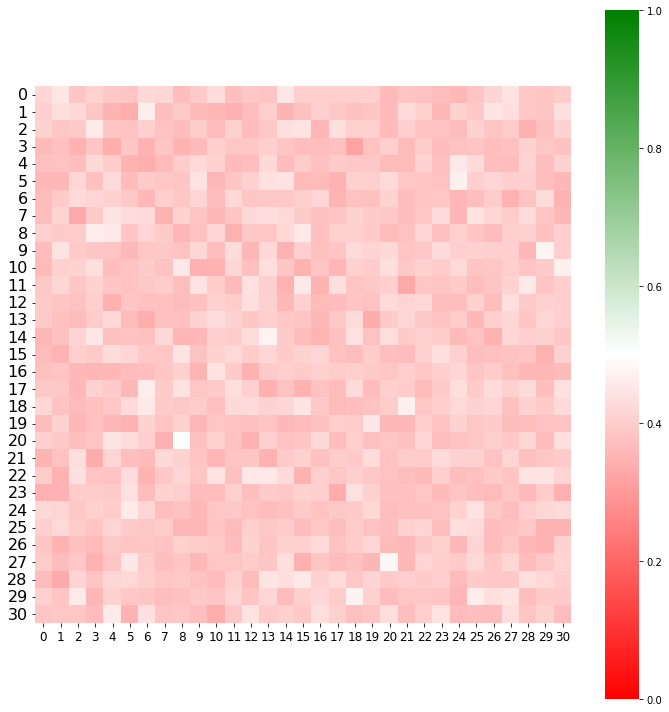

In [ ]:
import numpy as np
# predictions = func(1)[1]

import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

predictions = [item.tolist()[0][0] for item in func(epochs)[1]]

x_list = predictions[:961]
x = np.array((x_list))
# x_res=x.reshape(math.sqrt(len(x)),math.sqrt(len(x))) #old
x_res=x.reshape(int(math.sqrt(len(x))),int(math.sqrt(len(x))))
cmap=LinearSegmentedColormap.from_list('gr',["r", "w", "g"], N=256)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(x_res, square=True, ax=ax, cmap=cmap, vmin=0, vmax=1)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.tight_layout()
plt.savefig('colorlist.png')

Real Use cases

In [ ]:
import pickle
import numpy
model = pickle.load(open("pima.pickle.dat", "rb"))

In [ ]:
stuff = numpy.array(X_test[0])
model.predict(stuff.reshape(1, -1)).tolist()[0]

0

In [ ]:
X_test[0]

array([-1.19913061, -0.94983775,  1.16132155])

Data Analysis

In [ ]:
path = "/content/drive/MyDrive/sample.csv"
df = pd.read_csv(path)

In [ ]:
class dataPoint:
  def __init__(self, x, y, ph, tds, turbidity):
    self.loc = numpy.asarray([x,y])
    self.values = (ph, tds, turbidity)

  def __str__(self):
    return f'x coord: {self.loc[0]}, y coord: {self.loc[1]}'
  
  def __repr__(self):
    return f'({self.loc[0]}, {self.loc[1]})'

In [ ]:
lst = df.values.tolist()
newLst = []
for i in lst:
  a = dataPoint(i[0], i[1], i[2], i[3], i[4])
  newLst.append(a)

In [ ]:
x = [i.loc[0] for i in newLst]
y = [i.loc[1] for i in newLst]

In [ ]:
width = math.ceil((max(x) - min(x))/5) + 1
height = math.ceil((max(y) - min(y))/5) + 1

In [ ]:
grid = [[None for w in range(width)] for h in range(height)]

In [ ]:
distance = 5
for data in newLst:
  loc = (data.loc)/5
  grid[int(loc[0])][int(loc[1])] = data
predictedGrid = [[round(model.query(i.values)[1][0], 2) for i in j] for j in grid]
# predictedGrid = [[model.predict(numpy.asarray(i.values).reshape(1, -1)).tolist()[0] for i in j] for j in grid]

In [ ]:
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
import plotly.express as px
fig = px.imshow(predictedGrid, text_auto=True)
fig.show()
fig.write_image("image.jpeg")

In [ ]:
!pip install cloudinary

     |████████████████████████████████| 172 kB 12.7 MB/s 
     |████████████████████████████████| 138 kB 68.4 MB/s 
  Created wheel for cloudinary: filename=cloudinary-1.29.0-py3-none-any.whl size=137470 sha256=f8a9a4e2eaee5f5495db375e0131a6c7c05f384419543f35ab1894271ab65da0
  Stored in directory: /root/.cache/pip/wheels/b4/02/2f/d29867c75ed2e877fd1754d1b868f68478cda57e5d27a59f24
Successfully built cloudinary
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import cloudinary
import cloudinary.uploader
import cloudinary.api